##  **I. Import libraries and read information basic dataset**
---

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
data = pd.read_csv('Dataset/raw_data.csv', encoding='latin-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [68]:
data.duplicated().sum()

np.int64(5268)

In [69]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##  **II. Expolatory basic dataset and Processing**

---



Theo đề bài, các InvoiceNo có tiền tố "C" là các đơn hàng hủy, vậy cần phải loại bỏ giá trị này (Cùng với các giá trị khi đặt hàng)

In [70]:
# lấy data có "C" trong InvoiceNo
canceled_orders = data[data['InvoiceNo'].str.startswith('C')]
canceled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [71]:
# Loại bỏ cả giao dịch đặt hàng và hủy 
for _, row in canceled_orders.iterrows():
    # Lấy InvoiceNo và Quantity của giao dịch hủy
    original_invoice = row['InvoiceNo'][1:]  # Bỏ tiền tố "C" để tìm giao dịch gốc
    quantity = abs(row['Quantity'])          # Giá trị tuyệt đối của Quantity

    # Bỏ giao dịch đặt
    data = data[~((data['InvoiceNo'] == original_invoice) & (data['Quantity'] == quantity))]
    # Bỏ giao dịch hủy
    data = data[~(data['InvoiceNo'] == row['InvoiceNo'])]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  531167 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.6+ MB


Theo đề bài, các StockCode và CustomerID là một số nguyên gồm 5 chữ số , vậy cần phải loại bỏ các giá trị không phù hợp

In [73]:
# Lọc các giá trị chỉ là số nguyên gồm 5 chữ số
data = data[data['StockCode'].str.match(r'^\d{5}$')]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom


In [74]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1044
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     115866
Country             0
dtype: int64

- Cột Description có 1454 giá trị null
- Cột CustomerID có 135080 giá trị null

In [75]:
# string sang date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date
data['InvoiceDate'].head()

1    2010-12-01
5    2010-12-01
6    2010-12-01
7    2010-12-01
8    2010-12-01
Name: InvoiceDate, dtype: object

In [76]:
# loai bo nan
data['CustomerID'] = data['CustomerID'].dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom


In [77]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,478985.000000,478985.000000,363119.000000
mean,10.495656,3.260413,15295.738347
std,167.223673,4.440992,1711.946809
min,-9600.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,4.000000,2.080000,15159.000000
75%,12.000000,4.130000,16794.000000
max,80995.000000,649.500000,18287.000000


<Axes: >

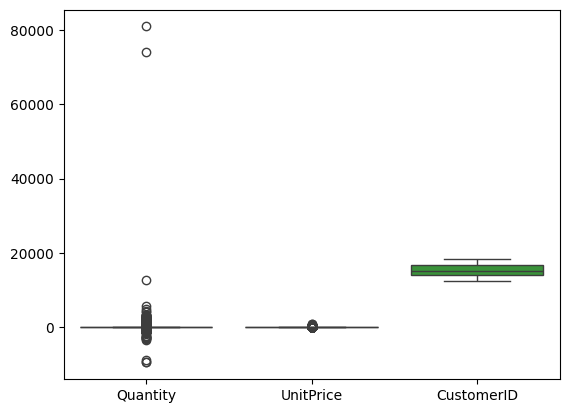

In [78]:
sb.boxplot(data=data)

- Ở 2 cột Quantity và UnitPrice, các điểm dữ liệu tập trung phần lớn với nhau.
- Tuy nhiên vẫn có những điểm nằm cách xa nó ▶ Các điểm đó có thể là các giá trị đặc biệt hoặc là Outliers

In [79]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1044
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     115866
Country             0
dtype: int64

##  **III. Calculate RFM**
---

#### **1. Calculate RFM**

In [80]:
from datetime import datetime, timedelta, date
# tinh ngay lon nhat + 1
curremt_date = data['InvoiceDate'].max() + timedelta(days=1)
curremt_date

datetime.date(2011, 12, 10)

In [81]:
# total
data['TotalPay'] = data['Quantity'] * data['UnitPrice']

# group by id KH de tinh r f m
rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (curremt_date - x.max()).days,
                                                'InvoiceNo': 'count',
                                                'TotalPay': 'sum'})

In [82]:
data.to_csv('Dataset/cleaned_data.csv', index = False)

#### **2. Observe**

In [83]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,162,3653.45
12348.0,76,27,1437.24
12349.0,19,68,1372.42
12350.0,311,13,258.00


In [84]:
rfm = rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPay': 'Monetary'}).reset_index()
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,162,3653.45
2,12348.0,76,27,1437.24
3,12349.0,19,68,1372.42
4,12350.0,311,13,258.00


- Cần theo dõi phân phối dữ liệu, để xem phân phối có ở dạng chuẩn không, nếu không chuẩn thì sẽ áp dụng các phương pháp [Transform Data](https://www.geeksforgeeks.org/data-transformation-in-machine-learning/) để đưa dữ liệu về dạng chuẩn để model hoạt động hiệu quả.

##  **IV. Data Transformation**
---

#### **1. Summary RFM data**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\2533663606.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm['Recency'], ax = ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\2533663606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm['Frequency'], ax = ax[1])
C:\Users\ASUS\Ap

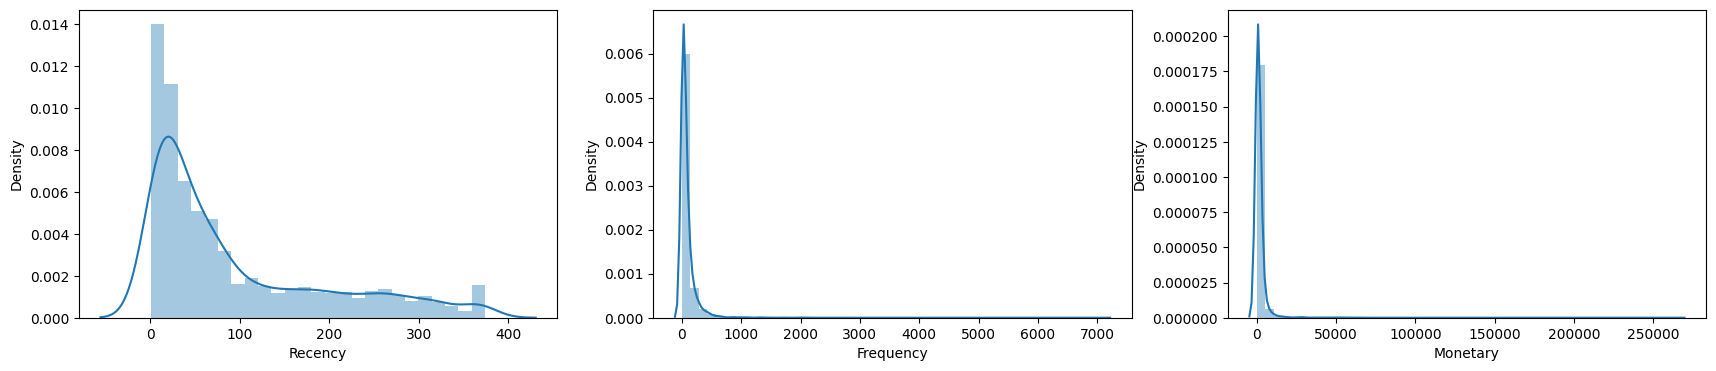

In [85]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(21,4))
sb.distplot(rfm['Recency'], ax = ax[0])
sb.distplot(rfm['Frequency'], ax = ax[1])
sb.distplot(rfm['Monetary'], ax = ax[2])
plt.show()

`Comment:`  
- Quan sát phân phối ở 3 biểu đồ, ta thấy cả ba đại lượng đều theo Right-skewed (Positive skew) và không tuân theo phân phối chuẩn, chúng ta cần thực hiện một số phương pháp chuẩn hóa dữ liệu trước khi sử dụng một số thuật toán xây dựng model.  
-  Đề suất một số phương thức chuẩn hóa dữ liệu:
   - `log root` tranformation.  
   - `cube root` tranformation.
   - `square root` transformation.
   - `box-cox` tranformation.

#### **2. Trasform data**

In [86]:
# Ham kiem tra phuong phap Transform nao chuan
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))

    # xu ly gia tri vo cuc
    valid_data = rfm[x][np.isfinite(rfm[x])]

    sb.distplot(rfm[x], ax=ax[0,0])
    sb.distplot(np.log(rfm[x]), ax=ax[0,1])
    sb.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sb.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print("Original Skewness:", rfm[x].skew().round(2))
    print("Log Root-transformed Skewness:", np.log(rfm[x]).skew().round(2))
    print("Square Root-transformed Skewness:", np.sqrt(rfm[x]).skew().round(2))
    print("Boxcox Root-transformed Skewness:", pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\696864955.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm[x], ax=ax[0,0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\696864955.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(rfm[x]), ax=ax[0,1])
C:\Users\ASUS\AppData\Local

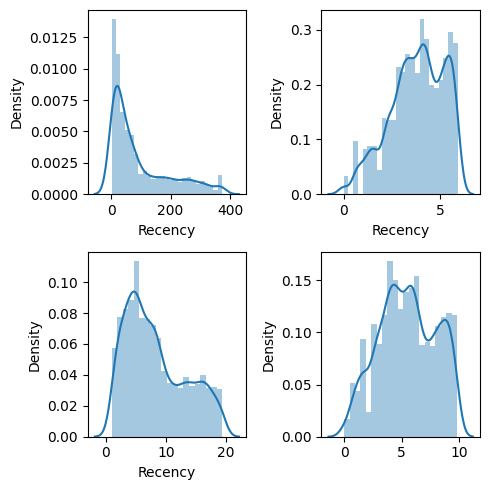

Original Skewness: 1.24
Log Root-transformed Skewness: -0.47
Square Root-transformed Skewness: 0.6
Boxcox Root-transformed Skewness: -0.06


In [87]:
# test recency
analyze_skewness('Recency')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\696864955.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm[x], ax=ax[0,0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\696864955.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(rfm[x]), ax=ax[0,1])
C:\Users\ASUS\AppData\Local

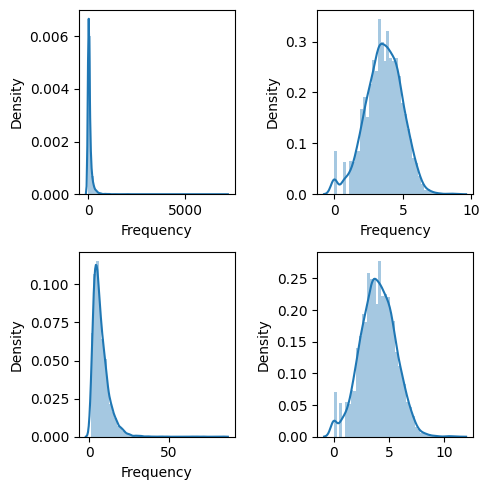

Original Skewness: 17.91
Log Root-transformed Skewness: -0.21
Square Root-transformed Skewness: 3.17
Boxcox Root-transformed Skewness: 0.0


In [88]:
analyze_skewness('Frequency')

`Comment:`  
- Quan sát phân phối ở 2 tập biểu đồ trên, ta thấy Boxcox tạo ra phân phối gần = 0 (-0.07 và 0) nên ta chọn Boxcox để transform
- Đối với Monetary value có các giá trị âm nên sẽ dùng cube root (tính căn bậc ba)

In [89]:
#transform du lieu
data_customers_use = pd.DataFrame()
data_customers_use['Recency'] = stats.boxcox(rfm['Recency'])[0]
data_customers_use['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
data_customers_use['Monetary'] = pd.Series(np.cbrt(rfm['Frequency'])).values
data_customers_use.head(10)

,Recency,Frequency,Monetary
0,9.466203,0.000000,1.000000
1,1.199802,5.782233,5.451362
2,6.218744,3.578608,3.000000
3,3.749822,4.690293,4.081655
4,9.349033,2.734118,2.351335
5,4.869405,4.827604,4.235824
6,8.349461,1.434748,1.587401
7,8.649533,4.473990,3.848501
8,8.460382,2.320602,2.080084
9,4.058796,4.430434,3.802952


#### **3. Scale data with Standard Scaler**

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_customers_use = scaler.fit_transform(data_customers_use)

data_customers_use

array([[ 1.61618359, -2.52711841, -1.61794827],
       [-1.73911138,  1.1401062 ,  1.10530074],
       [ 0.29805447, -0.25748358, -0.39439056],
       ...,
       [-1.22677314, -0.85057015, -0.82910319],
       [-1.59698318,  2.40031727,  3.25099048],
       [-0.14038048,  0.32385628,  0.13839336]])

In [91]:
pd.DataFrame(data_customers_use).head()

,0,1,2
0,1.616184,-2.527118,-1.617948
1,-1.739111,1.140106,1.105301
2,0.298054,-0.257484,-0.394391
3,-0.704070,0.447572,0.267343
4,1.568625,-0.793078,-0.791230


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\1894797442.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers_use[:, 0], ax = ax[0]) # Access columns using integer indices
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12716\1894797442.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

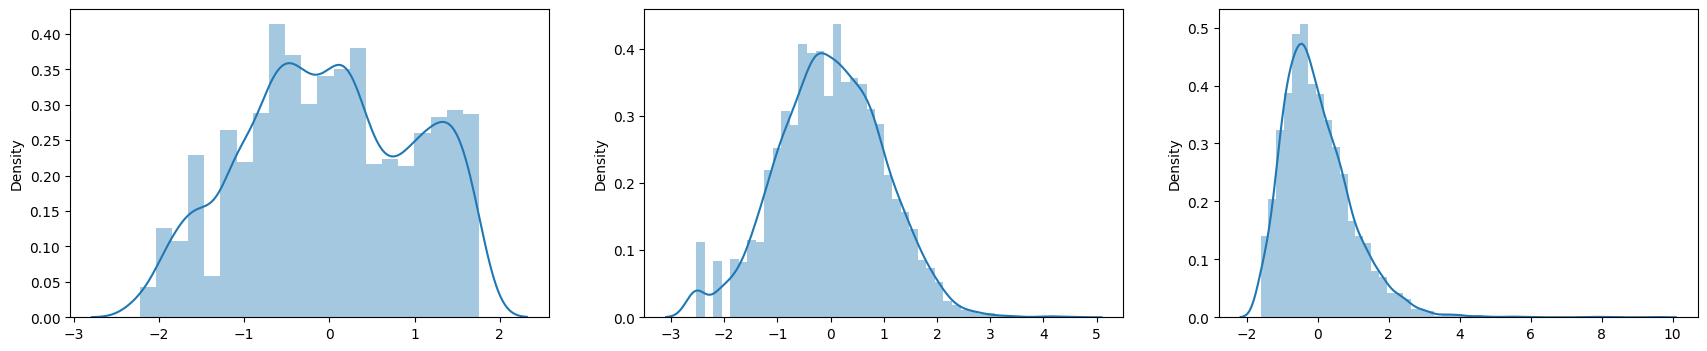

In [92]:
# Quan sat lai phan phoi

fig, ax = plt.subplots(1, 3, figsize=(21,4))
sb.distplot(data_customers_use[:, 0], ax = ax[0]) # Access columns using integer indices
sb.distplot(data_customers_use[:, 1], ax = ax[1])
sb.distplot(data_customers_use[:, 2], ax = ax[2])
plt.show()

In [93]:
data_customers_use = pd.DataFrame(data_customers_use)

# Main Data 
rfm.to_csv('Dataset/rfm_data.csv', index = False) 
# Data khi scale
data_customers_use.to_csv('Dataset/scaled_data.csv', index = False) 